In [32]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [33]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
csv_file_path = Path('/Users/janhavibharati/credit-risk-classification/Credit_Risk/lending_data.csv')
df = pd.read_csv(csv_file_path)

# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [34]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df['loan_status']

# Separate the X variable, the features
X = df.drop(columns='loan_status')

In [35]:
# Review the y variable Series
print("First few entries in y:")
y.head()

First few entries in y:


0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [36]:
# Review the X variable DataFrame
print("First few entries in X:")
X.head()

First few entries in X:


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [37]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [38]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state=1)

# Fit the model using training data
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [39]:
# Make a prediction using the testing data
y_pred = model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

Confusion Matrix:
[[14926    75]
 [   46   461]]


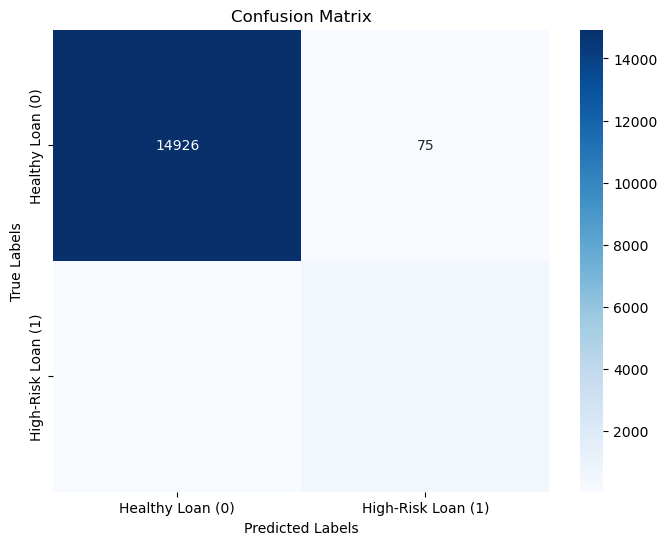

In [40]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy Loan (0)', 'High-Risk Loan (1)'],
            yticklabels=['Healthy Loan (0)', 'High-Risk Loan (1)'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [41]:
# Print the classification report for the model
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15001
           1       0.86      0.91      0.88       507

    accuracy                           0.99     15508
   macro avg       0.93      0.95      0.94     15508
weighted avg       0.99      0.99      0.99     15508



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model has proven to be highly effective in predicting loan statuses, achieving an impressive accuracy of 99%. Its ability to accurately identify healthy loans is exceptional, with a perfect precision and recall score. For high-risk loans, while the model still demonstrates strong performance with a precision of 86% and a recall of 91%, there is room for improvement in reducing the number of false positives.

Overall, the model's metrics indicate that it is well-suited for assessing the creditworthiness of borrowers. Given its robust performance, it can be confidently recommended for implementation in the company's lending decision processes. However, it is essential to regularly monitor the model's predictions and make necessary adjustments to maintain its effectiveness, especially in accurately classifying high-risk loans. Continuous evaluation will help ensure that the model adapts to any changes in lending patterns and borrower behavior over time.

---